In [366]:
import json
import os
import matplotlib.pyplot as plt

In [367]:

def plot_results(
    results,
    methods_order=["Auto GoT/GPT", "Auto GoT/Gemini", "Manual GoT/GPT"],
    model="GPT-3.5",
    length=32,
    y_lower=0,
    cost_upper=0.0,
    display_solved=True,
    annotation_offset=0,
    display_left_ylabel=False,
    display_right_ylabel=False,
):
    methods_order = [method for method in methods_order if method in results]
    # Extract scores based on the order
    scores_ordered = [
        [
            min(score, length)
            for score in results[method]["scores"]
        ]
        for method in methods_order[:-1]
    ]
    total_costs = [results[method]["costs"] for method in methods_order]

    # Create figure and axis
    fig, ax = plt.subplots(dpi=150, figsize=(4, 6))

    # Create boxplots
    positions = range(1, len(methods_order) + 1)
    print(positions)
    ax.boxplot(scores_ordered, positions=positions[:-1], widths=0.55)
    ax.bxp(results["Manual GoT/GPT"]["scores"], positions=[3], widths=0.55, showfliers=False)


    fig_fontsize = 12

    # Set the ticks and labels
    method_labels = ["Auto GoT/GPT", "Auto GoT/Gemini", "Manual GoT/GPT"]
    plt.yticks(fontsize=fig_fontsize)
    ax.set_xticks(range(1, len(methods_order) + 1))
    # ax.set_xticks(range(1, len(methods_order) + 1))
    ax.set_xticklabels(method_labels, fontsize=fig_fontsize-4)

    y_upper = length

    range_increase = 1
    if display_solved:
        if length < 48:
            range_increase = 2
        elif length < 96:
            range_increase = 4
        else:
            range_increase = 8

    ax.set_ylim(y_lower, y_upper + range_increase)
    ax1_yticks = range(
        y_lower, y_upper + 1, 2 if length < 48 else (4 if length < 96 else 8)
    )
    ax.set_yticks(ax1_yticks)
    if display_left_ylabel:
        ax.set_ylabel(f"#incorrectly sorted elements; the lower the better")

    # ax.set_title(f"{length} elements")

    ax2 = ax.twinx()
    ax2.bar(positions, total_costs, alpha=0.5, color="blue", label="Total Cost ($)")
    ax2.yaxis.set_tick_params(colors="#1919ff", labelsize=fig_fontsize)
    if cost_upper > 0:
        ax2.set_ylim(0, cost_upper)
        number_of_ticks = len(ax.get_yticks())
        tick_interval = cost_upper / (number_of_ticks)
        ax2_ticks = [tick_interval * i for i in range(number_of_ticks)]

        # Set custom tick positions for ax2
        ax2.set_yticks(ax2_ticks)

    if display_right_ylabel:
        ax2.set_ylabel(
            "Total Cost ($); the lower the better",
            color="#1919ff",
            fontsize=fig_fontsize,
        )

    if display_solved:
        annotation_height = y_upper + annotation_offset
        count = 1
        for method in methods_order:
            if method not in results:
                continue
            solved = results[method]["solved"]
            ax.text(
                count,
                annotation_height,
                f"{solved}",
                ha="center",
                va="bottom",
                fontsize=fig_fontsize,
            )
            count += 1

    model = model.replace(".", "").replace("-", "").lower()
    fig.savefig(f"./output/plot_exp/doc_merge.pdf", bbox_inches="tight")




In [368]:
# #sorting 32
# plot_data = {
#     "Auto GoT/GPT": {
#         "scores": [2, 16, 6, 3, 14, 16, 3, 0, 16, 31, 10, 15, 1, 16, 1, 3, 6, 6, 10, 3, 4, 7, 18, 23, 2, 18, 16, 4, 3, 2, 1, 6, 6, 1, 5, 8, 2, 1, 6, 0, 3, 2, 1, 0, 15, 22, 1, 2, 13, 10, 2, 3, 7, 3, 5, 3, 3, 7, 2, 4, 25, 6, 2, 16, 2, 2, 23, 4, 3, 2, 2, 3, 3, 0, 1, 5, 3, 2, 3, 4, 7, 4, 7, 4, 2, 3, 17, 14, 10, 3, 2],
#         "costs": 0.68,
#         "solved": 4
#     }, 
#     "Auto GoT/Gemini": {
#         "scores": [29, 29, 28, 17, 30, 27, 20, 30, 30, 30, 14, 22, 10, 30, 30, 8, 24, 32, 17, 12, 24, 29, 23, 29, 27, 13, 22, 16, 7, 8, 22, 30, 22, 21, 14, 21],
#         "costs": 0,
#         "solved": 0
#     }, 
#     "Manual GoT/GPT": {
#         "scores": [{'med':2.0, 'q1':1.0, 'q3':2.0, 'whislo':0.0, 'whishi':3.0}],
#         "costs": 1.15,
#         "solved": 0
#     }
# }

In [369]:
# #sorting 64
# plot_data = {
#     "Auto GoT/GPT": {
#         "scores": [14, 64, 38, 22, 13, 26, 14, 17, 25, 10, 14, 14, 14, 25, 64, 20, 31, 10, 13, 15, 16, 7, 23, 10, 13, 26, 14, 18, 11, 10, 17, 37, 6, 23, 9, 31, 7, 8, 11, 49, 17, 11, 54, 45, 64, 13, 8, 36, 15, 7, 18, 17, 32, 22, 12, 16, 6, 21, 9, 16, 19, 14, 22, 6, 15, 10, 27, 17, 6, 64, 18, 15, 13, 18, 21, 10, 64, 21],
#         "costs": 1.86,
#         "solved": 4
#     }, 
#     "Auto GoT/Gemini": {
#         "scores": [38, 60, 52, 53, 24, 35, 51, 59, 37, 48, 56, 60, 20, 29, 23, 29, 37, 35, 40, 10, 55, 52, 18, 46, 48, 64, 49, 42, 32, 17, 34, 26, 30, 53, 52, 49, 9, 20, 33, 17, 53, 19, 44, 22],
#         "costs": 0,
#         "solved": 0
#     }, 
#     "Manual GoT/GPT": {
#         "scores": [{'med':7.0, 'q1':5.0, 'q3':8.0, 'whislo':1.0, 'whishi':12.0}],
#         "costs": 3.23,
#         "solved": 0
#     }
# }

In [370]:
# #sorting 128
# plot_data = {
#     "Auto GoT/GPT": {
#         "scores": [54, 41, 100, 26, 80, 62, 113, 113, 69, 44, 56, 99, 44, 20, 118, 30, 24, 39, 56, 55, 78, 46, 80, 28, 118, 52, 81, 36, 113, 71, 107, 77, 78, 113, 26, 99, 83, 39, 113, 32, 54, 35, 28, 34, 60, 24, 48, 32, 71, 19, 49, 66, 70, 30, 43, 34, 32, 52, 113, 58, 35, 83, 82, 48, 61, 126, 69, 61, 32, 72, 86, 26, 40],
#         "costs": 2.71,
#         "solved": 4
#     }, 
#     "Auto GoT/Gemini": {
#         "scores": [126, 122, 86, 101, 116, 107, 92, 92, 121, 92, 114, 82, 121, 77, 92, 68, 124, 126, 127, 124, 126, 108, 107, 123, 105, 117, 90, 105, 82, 31, 126, 126, 81, 117, 122, 120, 124, 67, 120, 110, 84, 64, 120, 104, 100, 106],
#         "costs": 0,
#         "solved": 0
#     }, 
#     "Manual GoT/GPT": {
#         "scores": [{'med':17.0, 'q1':14.0, 'q3':21.0, 'whislo':8.0, 'whishi':29.0}],
#         "costs": 8.43,
#         "solved": 0
#     }
# }

In [371]:
# #intersection 32
# plot_data = {
#     "Auto GoT/GPT": {
#         "scores": [0, 0, 7, 10, 22, 1, 7, 7, 8, 11, 23, 4, 16, 2, 7, 0, 11, 17, 10, 0, 4, 5, 1, 7, 20, 9, 2, 1, 0, 9, 25, 4, 11, 1, 9, 32, 3, 22, 8, 12, 4, 17, 12, 11, 11, 10, 10, 14, 28, 9, 32, 3, 16, 20, 18, 16, 15, 5, 4, 15, 32, 3, 9, 1, 5, 12, 6, 15, 7, 1, 15, 16, 21, 7, 10, 1, 3, 0, 32, 6, 11, 12, 14, 6, 5, 7, 4, 11, 11, 0],
#         "costs": 0.64,
#         "solved": 7
#     }, 
#     "Auto GoT/Gemini": {
#         "scores": [13, 19, 14, 13, 12, 19, 7, 19, 9, 15, 22, 18, 17, 21, 21, 11, 15, 14, 12, 18, 18, 16, 15, 18, 12, 8, 8, 18, 22, 8, 21, 20, 10, 17, 10, 14, 18, 14, 18, 22, 14, 17, 18, 20, 20, 21, 11, 13, 16, 6, 14, 17, 18, 19, 18, 18, 20, 11, 10, 19, 7, 7, 14, 22, 12, 17, 19, 15, 12, 10, 18, 9, 19, 16, 7, 21, 19, 20, 32, 9, 16, 20, 13, 11, 13, 17, 8, 8, 16, 10],
#         "costs": 0,
#         "solved": 0
#     }, 
#     "Manual GoT/GPT": {
#         "scores": [{'med':1.0, 'q1':0.0, 'q3':1.0, 'whislo':0.0, 'whishi':2.0}],
#         "costs": 0.59,
#         "solved": 0
#     }
# }

In [372]:
# # intersection 64
# plot_data = {
#     "Auto GoT/GPT": {
#         "scores": [38, 34, 28, 22, 16, 37, 18, 64, 24, 36, 20, 50, 64, 20, 20, 46, 21, 29, 21, 64, 45, 6, 15, 28, 61, 30, 25, 29, 23, 64, 30, 12, 10, 40, 22, 31, 26, 31, 38, 23, 17, 17, 44, 44, 21, 45, 7, 49, 27, 17, 12, 64, 8, 43, 64, 24, 64, 37, 32, 49, 25, 17, 31, 48, 64, 43, 17, 21, 39, 54, 38, 34, 20, 18, 25, 14, 38, 31, 40, 26, 41, 64, 15, 54, 64, 37, 64],
#         "costs": 1.76,
#         "solved": 7
#     }, 
#     "Auto GoT/Gemini": {
#         "scores": [38, 60, 52, 53, 24, 35, 51, 59, 37, 48, 56, 60, 20, 29, 23, 29, 37, 35, 40, 10, 55, 52, 18, 46, 48, 64, 49, 42, 32, 17, 34, 26, 30, 53, 52, 49, 9, 20, 33, 17, 53, 19, 44, 22],
#         "costs": 0,
#         "solved": 0
#     }, 
#     "Manual GoT/GPT": {
#         "scores": [{'med':4.0, 'q1':3.0, 'q3':6.0, 'whislo':0.0, 'whishi':10.0}],
#         "costs": 1.4,
#         "solved": 0
#     }
# }

In [373]:
# # intersection 128
# plot_data = {
#     "Auto GoT/Gemini": {
#         "scores": [41, 70, 58, 57, 66, 38, 48, 91, 62, 85, 77, 56, 76, 79, 62, 46, 79, 59, 56, 42, 68, 128, 64, 55, 56, 128, 41, 128, 49, 83, 50, 56, 72, 61, 50, 54, 94, 58, 90, 45, 128, 64, 128, 68, 87, 110, 78, 62, 67, 128, 85, 51, 55, 38, 68, 84, 63, 55, 60, 68, 74, 51, 65, 40, 85, 74, 62, 76, 49, 59, 63, 85, 55, 128, 54, 70, 75, 86, 59],
#         "costs": 0.0,
#         "solved": 7
#     }, 
#     "Auto GoT/GPT": {
#         "scores": [35, 50, 33, 59, 34, 71, 57, 68, 44, 69, 128, 68, 66, 61, 55, 43, 59, 51, 45, 55, 117, 72, 42, 54, 128, 128, 128, 128, 128, 128, 76, 39, 105, 52, 128, 47, 81, 73, 56, 52, 60, 56, 79, 128, 128, 128, 53, 61, 54, 41, 75, 104, 35, 77, 65, 82, 79, 128, 56, 89, 81, 34, 70, 98],
#         "costs": 2.55,
#         "solved": 0
#     }, 
#     "Manual GoT/GPT": {
#         "scores": [{'med':12.5, 'q1':8.0, 'q3':16.0, 'whislo':0.0, 'whishi':24.0}],
#         "costs": 2.9,
#         "solved": 0
#     }
# }

In [374]:
# # keyword counting
# plot_data = {
#     "Auto GoT/Gemini": {
#         "scores": [22, 15, 23, 24, 24, 11, 29, 26],
#         "costs": 0.0,
#         "solved": 7
#     }, 
#     "Auto GoT/GPT": {
#         "scores": [19, 7, 12, 9, 14, 9, 36, 19, 14, 22, 14, 9, 12, 10, 32, 15, 18, 4, 20, 30, 20, 5, 44, 18, 9, 12, 39, 8, 15, 7, 26, 11, 15, 12, 25, 23, 12, 12, 9, 12, 15, 12, 15, 34, 19, 7, 23, 6, 16, 18, 16, 15, 22, 7, 13, 16, 7, 13, 11, 10, 18, 10, 30, 14, 14, 11, 12, 10, 8, 15, 21, 17, 11, 9, 23, 19, 21, 15, 10, 10, 11, 13, 12, 29, 11, 15, 18, 13, 14, 11],
#         "costs": 1.13,
#         "solved": 0
#     }, 
#     "Manual GoT/GPT": {
#         "scores": [{'med':1.2, 'q1':0.0, 'q3':2.0, 'whislo':0.0, 'whishi':4.0}],
#         "costs": 3.1,
#         "solved": 0
#     }
# }

In [375]:
# doc merge
plot_data = {
    "Auto GoT/Gemini": {
        "scores": [7.0909, 6.9767, 6.1538, 6.9365, 2.0392, 5.5882, 5.4545, 6.8571, 6.0667, 6.9545, 6.4286, 6.0667, 7.3182, 7.8298, 6.9841, 3.36, 6.2632, 4.5789, 7.2, 5.9187, 4.2308, 5.7905, 7.1318, 4.4444, 1.7143, 8.3399, 6.3415, 4.1067, 6.6032, 7.6667, 5.0926, 6.8571, 8.6154, 6.8571, 7.3043, 8.4706, 5.9459, 6.746, 7.2727, 7.4667, 4.8148, 8.8302, 7.0698, 8.4967, 7.197, 4.9608, 6.5041, 6.7317, 7.1318, 6.9841, 3.4783, 7.0909, 6.4286, 7.5362, 6.6032, 6.5041, 7.197, 6.2906, 7.4963, 7.875, 6.5167, 6.1754, 7.4667, 7.4074, 5.6, 5.4476, 6.4286, 6.3333, 6.25, 6.0526, 8.4183, 7.3182, 7.5362, 5.6, 7.4963, 6.6, 6.6, 6.5041, 6.5041, 7.0519, 6.2632, 7.4074, 7.1628, 5.6, 5.4545, 4.1975, 7.2, 6.8293, 7.4074, 7.9444, 2.9091, 6.3932, 7.9861, 5.1532],
        "costs": 0.0,
        "solved": 7
    }, 
    "Auto GoT/GPT": {
        "scores": [6.4, 7.6087, 7.197, 8.0816, 8.4706, 8.4706, 8.1633, 7.8014, 8.1361, 7.9444, 7.6522, 7.7447, 7.4667, 6.4, 7.4667, 7.2727, 8.0, 7.4074, 6.8571, 7.4667, 7.7447, 8.4706, 8.0816, 7.9444, 7.8298, 7.4963, 7.4667, 6.9841, 8.4706, 7.6522, 7.8014, 5.6, 7.9444, 7.3333, 7.6667, 7.8014, 7.3182, 7.4074, 7.9444, 5.3529, 7.9444, 6.8293, 7.8014, 8.1633, 7.6087, 6.3932, 6.5167, 7.8298, 7.3182, 7.0698, 8.1633, 6.8571, 8.1361, 6.8293, 8.1633, 7.4667, 7.4667, 3.1111, 7.9444, 8.1361, 7.4074, 7.2727, 6.9767, 7.8298, 7.4667, 7.4667, 6.5167, 5.8018, 7.4667, 7.8298, 6.9767, 6.4, 7.9444, 7.4074, 7.8298, 5.4476, 7.4667, 7.1318, 7.6087, 7.7447, 8.1633, 8.0, 7.4074, 7.1318, 6.5167, 8.32, 6.8571, 7.0, 7.197, 7.2727, 6.4, 7.2727, 6.7317, 7.7447, 7.8014, 7.4963, 7.6087, 8.1633, 7.1628],
        "costs": 2.53,
        "solved": 0
    }, 
    "Manual GoT/GPT": {
        "scores": [{'med':7.75, 'q1':7.5, 'q3':8.15, 'whislo':6.5, 'whishi':9.2}],
        "costs": 8.9,
        "solved": 0
    }
}

range(1, 4)


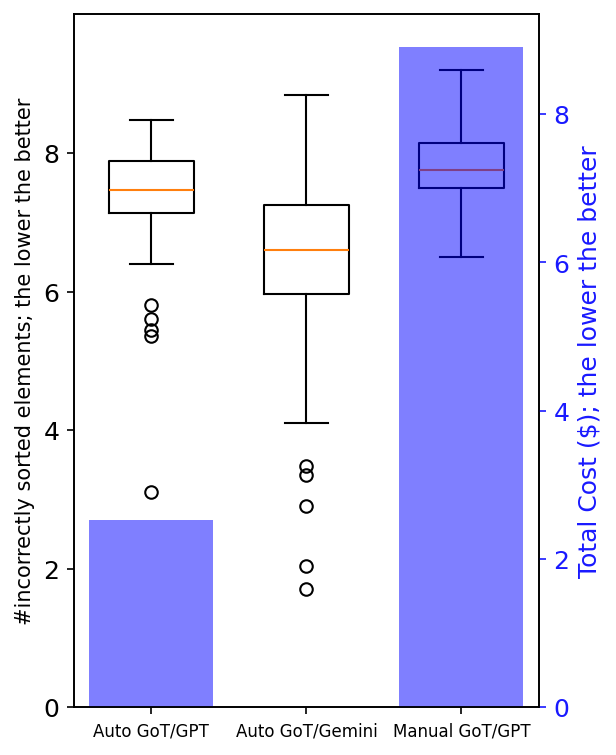

In [376]:
plot_results(
    plot_data,
    length=9,
    display_solved=False,
    model="GPT-3.5",
    display_left_ylabel=True,
    display_right_ylabel=True,
)